In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#importing data
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
train_path = '/content/drive/My Drive/ML_Project_9/train.csv'
valid_path = '/content/drive/My Drive/ML_Project_9/valid.csv'
test_path = '/content/drive/My Drive/ML_Project_9/test.csv'
train = pd.read_csv(train_path)
valid = pd.read_csv(valid_path)
test = pd.read_csv(test_path)
original_train = train.copy()
original_valid = train.copy()
original_test = test.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Imputing**

In [ ]:
train.isnull().sum()

feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_768      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 772, dtype: int64

Filling missing values with mean in train data set

In [ ]:
mean_age = int(train['label_2'].mean())
train['label_2'].fillna(mean_age, inplace=True)
train['label_2'] = train['label_2'].astype(int)
train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,45,27,1,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,45,27,1,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,45,27,1,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,45,27,1,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.041520,0.302638,0.004811,0.211441,-0.249326,-0.113395,-0.146776,-0.146222,-0.040344,-0.124016,...,0.290069,-0.223051,-0.053575,-0.230222,-0.451943,0.117817,39,29,1,6
28516,-0.056359,0.061850,0.051865,0.032107,-0.005930,-0.040313,0.117453,-0.067553,0.045004,0.035735,...,0.004518,0.035248,-0.047345,-0.006539,-0.025633,0.002474,39,29,1,6
28517,0.019361,0.148111,0.093434,0.011795,-0.074029,-0.077628,0.049933,-0.096354,0.138556,0.130414,...,0.014918,0.015676,-0.033608,0.068212,0.049871,-0.027607,39,29,1,6
28518,-0.043644,0.084073,0.074749,0.091776,-0.090782,-0.163187,-0.012568,-0.051021,0.038726,0.011009,...,-0.098420,0.113067,0.028218,0.036682,0.030056,-0.084346,39,29,1,6


In [ ]:
valid.isnull().sum()

feature_1       0
feature_2       0
feature_3       0
feature_4       0
feature_5       0
               ..
feature_768     0
label_1         0
label_2        14
label_3         0
label_4         0
Length: 772, dtype: int64

Filling missing values with mean in valid dataset

In [ ]:
mean_age = int(train['label_2'].mean())
valid['label_2'].fillna(mean_age, inplace=True)
valid['label_2'] = valid['label_2'].astype(int)
valid

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.130454,0.103857,0.130866,-0.036366,-0.152212,-0.072316,-0.041838,-0.019596,0.038727,0.022496,...,0.129246,0.018913,0.013387,-0.054259,0.006282,0.049646,45,27,1,6
1,0.019179,0.104888,0.079487,0.005187,-0.134111,-0.109271,0.054558,-0.083966,-0.000091,0.083015,...,-0.031823,0.061069,0.036411,0.101357,0.088504,0.008192,45,27,1,6
2,-0.028485,0.051889,0.033343,-0.029115,-0.091265,-0.038653,0.113460,-0.057983,0.128808,0.062455,...,-0.033106,-0.007366,-0.027673,0.052090,0.044097,0.054422,45,27,1,6
3,-0.078959,0.082325,0.068852,-0.028885,-0.146059,-0.071453,-0.028955,0.031253,0.034923,0.019338,...,0.164456,-0.025891,0.037993,0.012060,-0.044266,0.045405,45,27,1,6
4,0.001748,0.050968,-0.034524,0.074153,0.063857,-0.133338,0.102604,-0.031676,0.010629,-0.018684,...,-0.102749,0.022433,0.018421,0.086064,0.075351,-0.067089,45,27,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,-0.015146,0.075347,-0.067940,0.018324,-0.009130,-0.078199,0.019046,0.054832,0.057062,-0.041307,...,-0.037656,0.014558,-0.006257,0.114661,-0.020831,0.043870,39,29,1,6
746,-0.093367,0.090779,-0.014720,0.060278,-0.054997,0.012507,0.138347,0.064434,0.021669,0.038423,...,-0.102469,-0.012509,-0.024472,-0.082420,-0.018768,-0.091912,39,29,1,6
747,0.036313,0.053569,-0.040507,0.084671,-0.047545,-0.127989,0.048077,0.038251,0.058703,0.012898,...,-0.139285,-0.020544,-0.086482,0.202496,-0.089369,-0.052960,39,29,1,6
748,0.002803,0.127188,0.091111,-0.024576,-0.044046,-0.065907,-0.019063,-0.062951,0.066077,0.058489,...,0.055279,-0.014534,0.014749,0.017866,-0.008768,-0.017424,39,29,1,6


In [ ]:
valid.isnull().sum()

feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
              ..
feature_768    0
label_1        0
label_2        0
label_3        0
label_4        0
Length: 772, dtype: int64

# **Feature Selection**

## **PCA Dimentionality Reduction**

In [ ]:
from sklearn.decomposition import PCA

def performPca(train_input, valid_input,test_input, n_components):
    pca = PCA(n_components=n_components)
    train_reduced = pca.fit_transform(train_input)
    valid_reduced = pca.transform(valid_input)
    test_reduced = pca.transform(test_input)
    train_reduced_df = pd.DataFrame(train_reduced, columns=[f"new_feature_{i+1}" for i in range(train_reduced.shape[1])])
    valid_reduced_df = pd.DataFrame(valid_reduced, columns=[f"new_feature_{i+1}" for i in range(valid_reduced.shape[1])])
    test_reduced_df = pd.DataFrame(test_reduced, columns=[f"new_feature_{i+1}" for i in range(test_reduced.shape[1])])


    return train_reduced_df, valid_reduced_df,test_reduced_df


## **Mutual Information Selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_mi_scores(features, label, threshold):
    mi_scores = mutual_info_classif(features, label)
    colors = np.where(mi_scores > threshold, 'b', 'r')
    mi_df = pd.DataFrame({'Feature': features.columns, 'MI Score': mi_scores, 'Color': colors})
    mi_df = mi_df.sort_values(by='MI Score', ascending=False)
    plt.figure(figsize=(20, 8))
    bars = plt.bar(mi_df['Feature'], mi_df['MI Score'], color=mi_df['Color'])
    plt.xticks(rotation=90)
    plt.xlabel('Features')
    plt.ylabel('MI Scores')
    plt.title('Mutual Information Scores for Features')
    plt.legend(handles=[plt.Line2D([0], [0], color='b', lw=4, label='Above Threshold'),
                        plt.Line2D([0], [0], color='r', lw=4, label='Below Threshold')])
    blue_feature_count = np.sum(mi_df['Color'] == 'b')

    plt.show()
    return blue_feature_count


def miClassification(train_input, train_output, valid_input, test_input, num_features_to_select):
    mi_scores = mutual_info_classif(train_input, train_output)
    mi_scores = pd.Series(mi_scores, index=train_input.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    selected_features_train = mi_scores[:num_features_to_select]
    new_train_input = train_input[selected_features_train.index]
    new_valid_input = valid_input[selected_features_train.index]
    new_test_input = test_input[selected_features_train.index]
    return mi_scores , new_train_input , new_valid_input ,new_test_input, selected_features_train


# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores)

# **Classification Models**

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

def random_forest_classification(train_input, train_output, valid_input, valid_output):
    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(train_input, train_output)
    valid_predictions = rf_classifier.predict(valid_input)
    report = classification_report(valid_output, valid_predictions, output_dict=True)
    return  valid_predictions , report , rf_classifier


In [ ]:
def evaluate_with_f1_score(y_true, y_pred):
    report = classification_report(valid_label_1, y_pred, output_dict=True)

    # Access the macro-average values
    macro_avg_precision = report['macro avg']['precision']
    macro_avg_recall = report['macro avg']['recall']
    macro_avg_f1_score = report['macro avg']['f1-score']

    print(f'Macro-average precision: {macro_avg_precision}')
    print(f'Macro-average recall: {macro_avg_recall}')
    print(f'Macro-average F1-score: {macro_avg_f1_score}')


## **SVM Classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def train_svm_classifier(train_input, train_output, valid_input, valid_output):

    model = SVC()
    model.fit(train_input, train_output)
    y_pred = model.predict(valid_input)
    accuracy = accuracy_score(valid_output, y_pred)
    report = classification_report(valid_output, y_pred)

    print("Model Accuracy: {:.2f}%".format(accuracy * 100))

    return model, y_pred


## **XGBoost Classifier**

In [ ]:
import xgboost as xgb
import torch
from sklearn.metrics import accuracy_score, classification_report

def train_xgboost_classifier(train_input, train_output, valid_input, valid_output):

    xgb_gpu = None
    if (torch.cuda.is_available()):
      model = xgb.XGBClassifier(
          tree_method = 'gpu_hist',
          gpu_id = 0,
      )
    else:
      model = xgb.XGBClassifier()




    model.fit(train_input, train_output)
    y_pred = model.predict(valid_input)

    accuracy = accuracy_score(valid_output, y_pred)
    report = classification_report(valid_output, y_pred)

    print("Model Accuracy: {:.2f}%".format(accuracy * 100))

    return model, y_pred


# **Label 01**

Separating features and label 01

In [ ]:
train_features = train.iloc[:, :768]
train_label_1 = train.iloc[:, 768]

valid_features = valid.iloc[:, :768]
valid_label_1 = valid.iloc[:, 768]

test_features = test.iloc[:, :768]

Accuracy before feature engineering random forest model



In [ ]:
y_pred , report , classifier = random_forest_classification(train_features ,train_label_1 , valid_features , valid_label_1)

In [ ]:
accuracy_score(valid_label_1 , y_pred )

Accuracy before feature engineering svm


In [ ]:
model ,  y_pred  = train_svm_classifier(train_features ,train_label_1 , valid_features , valid_label_1)

Accuracy before feature engineering XGBoost

In [ ]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le1.fit(train_label_1)


In [ ]:
train_encoded_label_1 = le1.transform(train_label_1)

In [ ]:
le2 = LabelEncoder()
le2.fit(valid_label_1)

In [ ]:
valid_encoded_label_1 = le2.transform(valid_label_1)
valid_encoded_label_1

In [ ]:
train_xgboost_classifier(train_features ,train_encoded_label_1 , valid_features , valid_encoded_label_1)

SVM Classifier is choosed because the high accuracy level


Plotting the class distribution


In [ ]:
class_counts = train_label_1.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')


plt.show()


In [ ]:
threshold_array = [0.005, 0.01, 0.05, 0.1, 0.15]
remaining_features_count = []

for thresh in threshold_array:
    var_thres = VarianceThreshold(threshold=thresh)
    var_thres.fit(train_features)
    remaining_features_count.append(var_thres.get_support().sum())

print(remaining_features_count)

All most all the features has very low variances.

Feature selection based on mutual information

In [ ]:
feature_count = plot_mi_scores(train_features, train_label_1, threshold=0.07)


In [ ]:
feature_count

In [ ]:
mi_scores , new_train_features , new_valid_features ,new_test_features, selected_features_train = miClassification(train_features, train_label_1, valid_features, test_features, feature_count)

In [ ]:
model , y_predict = train_svm_classifier(new_train_features, train_label_1,new_valid_features , valid_label_1)

Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100 , 150 , 200 , 250 ]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


Changing max_depth parameter

In [ ]:
max_depths = [1,5,10,15, 20 ,25]
max_depths.append(None)
max_depths_1 =  [1,5,10,15, 20 ,25 , "None"]
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(new_train_features, train_label_1)

   train_pred = rf.predict(new_train_features)
   train_results.append(accuracy_score(train_label_1, train_pred))

   y_pred = rf.predict(new_valid_features)
   test_results.append(accuracy_score(valid_label_1, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths_1, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths_1, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("‘Tree depth’")
plt.show()

We can see overfitting senario in higher max_depths. should get tree_depth around values of 1-5

Changing max features param

In [ ]:
max_features = ["sqrt", "log2", None]
max_features_1 = ["sqrt", "log2", "None"]
train_results = []
test_results = []
for max_feature in max_features:
   rf = RandomForestClassifier(max_features = max_feature, n_jobs=-1)
   rf.fit(new_train_features, train_label_1)

   train_pred = rf.predict(new_train_features)
   train_results.append(accuracy_score(train_label_1, train_pred))

   y_pred = rf.predict(new_valid_features)
   test_results.append(accuracy_score(valid_label_1, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features_1, train_results, "b", label="Train")
line2, = plt.plot(max_features_1, test_results, "r", label="Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("Max Features")
plt.show()

sqrt parameter is the good one

Changing min_samples_split parameter

In [ ]:
min_samples_splits= [0.1 , 0.3 , 0.6 , 0.9 , 1.0 ]
train_results = []
test_results = []
for min_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split = min_split , n_jobs=-1)
   rf.fit(new_train_features, train_label_1)

   train_pred = rf.predict(new_train_features)
   train_results.append(accuracy_score(train_label_1, train_pred))

   y_pred = rf.predict(new_valid_features)
   test_results.append(accuracy_score(valid_label_1, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("Min Sample Splits")
plt.show()

cannot really give a conclusion

Changing min_samples_leaf parameter

In [ ]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf = min_samples_leaf , n_jobs=-1)
   rf.fit(new_train_features, train_label_1)

   train_pred = rf.predict(new_train_features)
   train_results.append(accuracy_score(train_label_1, train_pred))

   y_pred = rf.predict(new_valid_features)
   test_results.append(accuracy_score(valid_label_1, y_pred))

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("Accuracy Score")
plt.xlabel("Min Sample Leaf")
plt.show()

something around 0.4 will be good

Hyper Parameter Tuning For SVM Classifier

In [ ]:
model.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(new_train_features, train_label_1)

grid.best_params_ are `{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}`

In [ ]:
# measure accuracy using tuned SVC()

svc_ = SVC(C= 100, gamma= 0.1, kernel='rbf')
svc_.fit(new_train_features, train_label_1)

y_pred = svc_.predict(new_valid_features)
accuracy_score(valid_label_1, y_pred)

Label 01 test predictions

In [ ]:
test_predictions = svc_.predict(new_test_features)
test_predictions

# **Label 02**

In [ ]:
train_label_2 = train.iloc[:, 769]
valid_label_2 = valid.iloc[:, 769]

Plotting class distribution

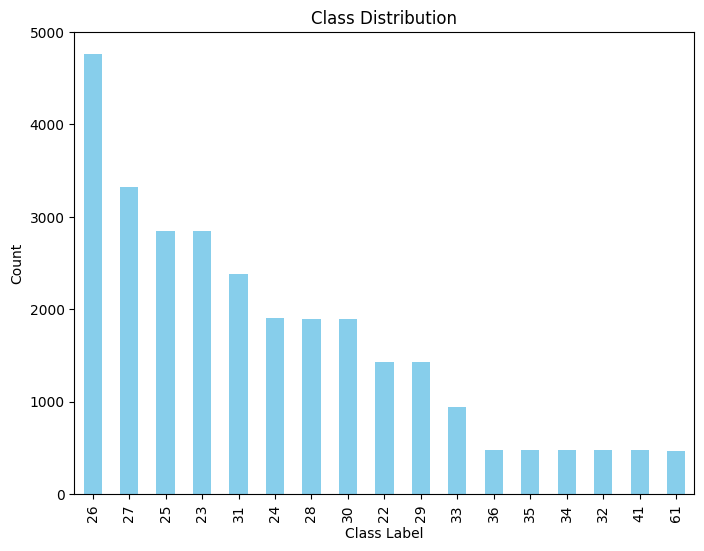

In [ ]:
class_counts = train_label_2.value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')


plt.show()

Accuracy before feature selection or enginnering
Random forest model

In [ ]:
valid_predict , report , rf_classifier = random_forest_classification(train_features, train_label_2, valid_features, valid_label_2)

In [ ]:
accuracy_score( valid_label_2 , valid_predict)

0.7573333333333333

Accuracy before feature selection or engineering SVM Classifier

In [ ]:
model ,  y_pred = train_svm_classifier(train_features, train_label_2, valid_features, valid_label_2)

Model Accuracy: 87.33%


Accuracy before feature engineering or selection XgBoost

In [ ]:
model , y_pred = train_xgboost_classifier(train_features, train_label_2, valid_features, valid_label_2)

Model accuracy is 85.73%

Model selection with cross validation

Due to the high level of running time , XGBoost technique was not used

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



classifiers = {
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
}


best_model = None
best_accuracy = 0.0


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits)

for name, clf in classifiers.items():
    total_accuracy = 0.0

    for train_index, test_index in skf.split(train_features, train_label_2):
        X_train, X_test = train_features.iloc[train_index], train_features.iloc[test_index]
        y_train, y_test = train_label_2[train_index], train_label_2[test_index]

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        total_accuracy += accuracy

    average_accuracy = total_accuracy / n_splits
    print(f"{name} - Average Accuracy: {average_accuracy}")


    if average_accuracy > best_accuracy:
        best_model = clf
        best_accuracy = average_accuracy

print(f"Best Model: {type(best_model).__name__}")



Trying PCA Transformation for label 2

In [ ]:
# Before principal component need to scale the features

In [ ]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
scaled_train_features = transformer.fit_transform(train_features)
scaled_valid_features = transformer.fit_transform(valid_features)
scaled_test_features = transformer.fit_transform(test_features)


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# train_rescaled = scaler.fit_transform(train_features)
# valid_rescaled = scaler.fit_transform(valid_features)
# test_rescaled = scaler.fit_transform(test_features)

In [ ]:
train_reduced_df, valid_reduced_df,test_reduced_df = performPca(scaled_train_features, scaled_valid_features, scaled_test_features, 0.99)

In [ ]:
model , after_pca_predictions = train_svm_classifier(train_reduced_df, train_label_2 , valid_reduced_df, valid_label_2)

Model Accuracy: 91.20%


1. 0.95  - 90.53%
2. 0.99  - 91.20%
3. 1     - 15.33%
4. 0.995 - 90.93%

In [34]:
svc_ = SVC()
svc_.fit(train_reduced_df, train_label_2)


test_predictions = svc_.predict(test_reduced_df)
test_predictions

array([23, 23, 26, 27, 26, 27, 23, 23, 26, 27, 26, 27, 25, 31, 27, 26, 23,
       23, 24, 25, 26, 25, 26, 27, 25, 23, 27, 27, 25, 26, 23, 26, 23, 27,
       27, 27, 27, 27, 25, 27, 31, 26, 26, 22, 24, 26, 26, 31, 27, 27, 27,
       23, 25, 26, 27, 27, 28, 25, 26, 30, 25, 26, 26, 26, 27, 27, 27, 26,
       26, 31, 26, 26, 26, 27, 26, 31, 27, 22, 27, 23, 26, 26, 23, 26, 28,
       27, 23, 25, 26, 26, 26, 23, 26, 23, 25, 22, 26, 23, 23, 23, 27, 26,
       26, 23, 27, 26, 27, 27, 26, 22, 27, 25, 26, 27, 25, 26, 27, 27, 27,
       23, 23, 26, 26, 25, 26, 25, 23, 28, 27, 27, 26, 26, 26, 26, 31, 27,
       27, 26, 23, 25, 27, 25, 25, 26, 26, 26, 23, 27, 26, 27, 26, 25, 23,
       22, 31, 27, 27, 26, 23, 26, 27, 22, 24, 23, 23, 27, 29, 24, 23, 27,
       26, 27, 26, 26, 26, 23, 28, 23, 26, 23, 23, 25, 26, 27, 23, 23, 26,
       27, 27, 26, 26, 26, 23, 23, 27, 27, 27, 26, 27, 26, 27, 27, 26, 26,
       25, 26, 31, 31, 27, 23, 25, 26, 26, 27, 23, 26, 25, 23, 26, 26, 23,
       23, 23, 25, 26, 24

Hyperparameter Optimization

In [ ]:
from sklearn.svm import SVC
import time
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

def hyperparameter_tune(base_model, parameters, n_iter, kfold, X, y):

    start_time = time.time()
    k = StratifiedKFold(n_splits=kfold, shuffle=False)
    optimal_model = RandomizedSearchCV(base_model,
                            param_distributions=parameters,
                            n_iter=n_iter,
                            cv=k,
                            n_jobs=-1,
                            random_state=42)

    optimal_model.fit(X, y)
    stop_time = time.time()

    scores = cross_val_score(optimal_model, X, y, cv=k, scoring="accuracy")

    print("Elapsed Time:", time.strftime("%H:%M:%S", time.gmtime(stop_time - start_time)))
    print("====================")
    print("Cross Val Mean: {:.3f}, Cross Val Stdev: {:.3f}".format(scores.mean(), scores.std()))
    print("Best Score: {:.3f}".format(optimal_model.best_score_))
    print("Best Parameters: {}".format(optimal_model.best_params_))

    return optimal_model.best_params_, optimal_model.best_score_



In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf' , 'linear' , 'poly']}

base_model = SVC()
hyperparameter_tune(base_model, param_grid, 5, 5, X=train_reduced_df, y=train_label_2)